In [5]:
import sys
sys.path.append('../src')

In [6]:
import numpy as np
from structure_learning.samplers import StructureMCMC
from structure_learning.data import SyntheticDataset, Data
from structure_learning.distributions import Distribution, OPAD
from structure_learning.data_structures import DAG
from structure_learning.scores import BGeScore, BDeuScore
from structure_learning.evaluation.metrics import KLD, JSD, MAE, MSE, SHD
# for reproducibility
np.random.seed(100)

In [7]:
# setup synthetic data
num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00010 00100 10000 00000 01010


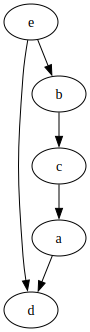

In [8]:
# visualise ground truth DAG
synthetic_data.graph.plot()

In [9]:
# setup mcmc
n_iterations = 100000
print(synthetic_data.data, synthetic_data.data.values)
M = StructureMCMC(data=synthetic_data.data, score_object='bge', max_iter=n_iterations, pc_init=True, result_type='distribution')

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'a': 'N', 'b': 'N', 'c': 'N', 'd': 'N', 'e': 'N'}


<structure_learning.data.data.Data object at 0x344b0b410>             a         b         c          d         e
0   -0.196445 -0.039365  0.005593  -0.453780 -0.453966
1    0.928469  0.584385 -0.133857   1.102345 -0.030515
2   -0.195909 -1.806724 -1.310008   0.987758 -0.783253
3    3.672439 -1.553858 -2.504501   5.624512 -1.207085
4    2.118560 -1.030663 -0.707275   2.436619  0.005117
..        ...       ...       ...        ...       ...
195 -3.726553  1.021710  2.485784  -5.164662  1.223314
196  8.735060 -2.204730 -4.911152  11.896884 -1.547577
197 -8.914967  2.234533  5.129776  -7.948369  1.181551
198  2.846533 -1.604027 -1.664003   3.002756 -0.592358
199  2.255836 -0.702683 -1.311533   3.316782 -0.928191

[200 rows x 5 columns]
Running PC algorithm


  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# run experiment
mcmc_results, acceptance = M.run()

In [11]:

print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.17795


/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


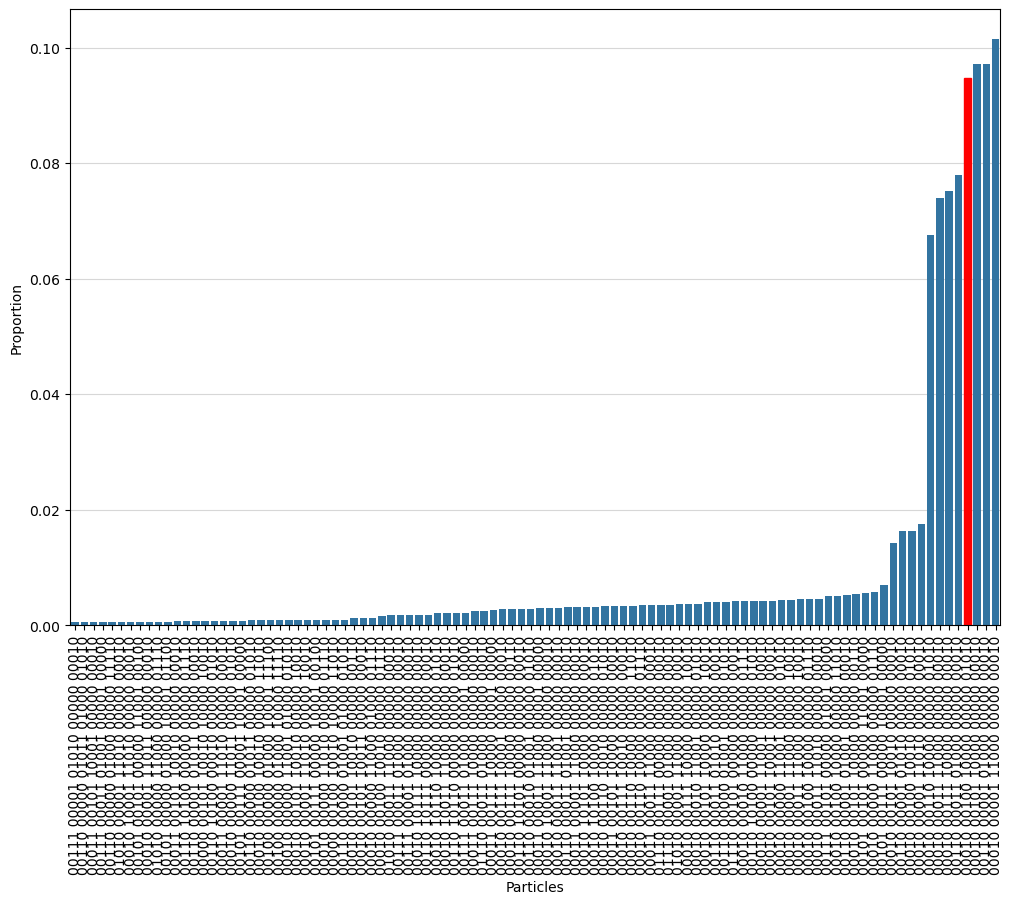

In [18]:
from matplotlib import pyplot as plt

key = synthetic_data.graph.to_key()
plt.rcParams['figure.figsize'] = 12,8
bars, keys, counts = mcmc_results.plot(sort=True, normalise=True, limit=100)
bars.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

In [19]:
true_dist = Distribution.compute_distribution(synthetic_data.data, score=BGeScore)

/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


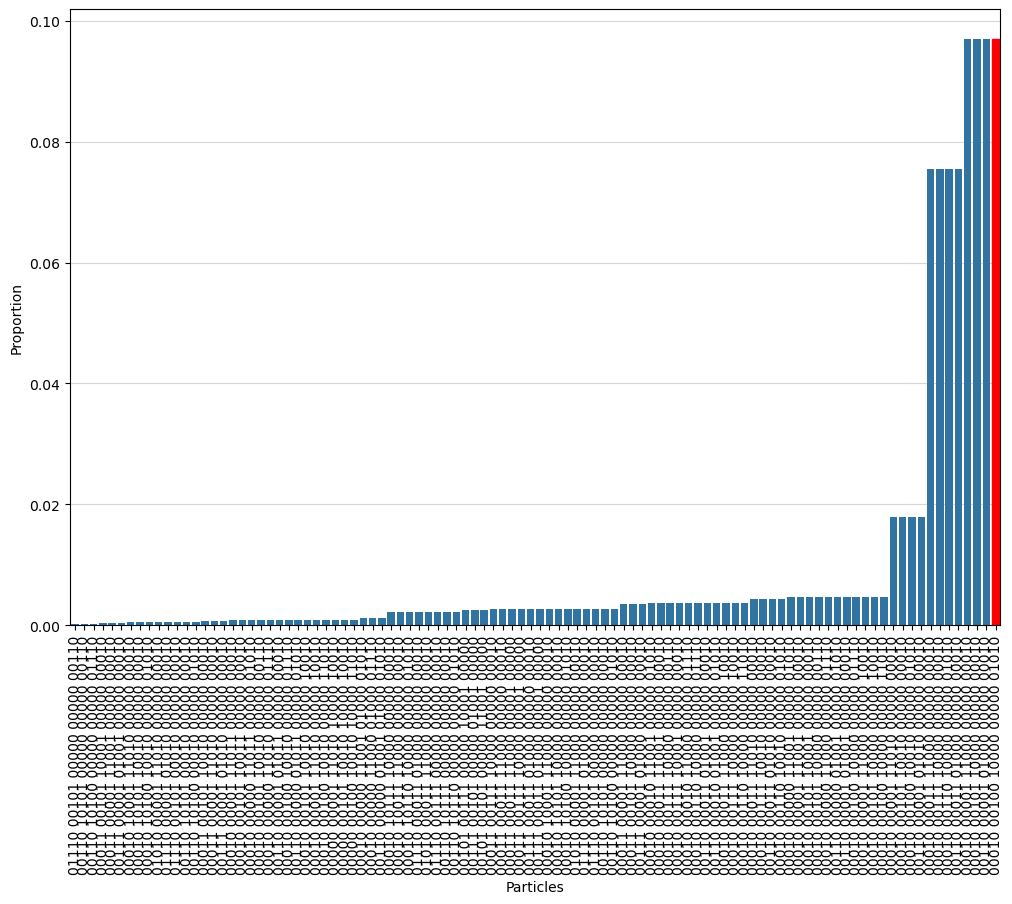

In [20]:

bars2, keys, counts = true_dist.plot(prop='p', sort=True, limit=100)
bars2.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

In [21]:
opad_results = mcmc_results.to_opad()
opad_plus_results = mcmc_results.to_opad(plus=True)

Adding rejected particles


### KLD

In [22]:
kld = KLD()
kld_mcmc = kld.compute(mcmc_results, true_dist)
kld_opad = kld.compute(opad_results, true_dist)
kld_opad_plus = kld.compute(opad_plus_results, true_dist)

print(kld_mcmc, kld_opad, kld_opad_plus)

0.03285931774354144 0.004382352589916827 0.0028383727774158947


### JSD

In [23]:
jsd = JSD()
jsd_mcmc = jsd.compute(mcmc_results, true_dist)
jsd_opad = jsd.compute(opad_results, true_dist)
jsd_opad_plus = jsd.compute(opad_plus_results, true_dist)

print(jsd_mcmc, jsd_opad, jsd_opad_plus)

0.0071036521411832546 0.0015177661690393405 0.0009832402764809718


### MSE

In [24]:
mse = MSE()
mse_mcmc = mse.compute(mcmc_results, true_dist)
mse_opad = mse.compute(opad_results, true_dist)
mse_opad_plus = mse.compute(opad_plus_results, true_dist)

print(mse_mcmc, mse_opad, mse_opad_plus)

6.2323776086214955e-09 4.8206969706680065e-11 2.315491116516797e-11


### MAE

In [25]:
mae = MAE()
mae_mcmc = mae.compute(mcmc_results, true_dist)
mae_opad = mae.compute(opad_results, true_dist)
mae_opad_plus = mae.compute(opad_plus_results, true_dist)

print(mae_mcmc, mae_opad, mae_opad_plus)

3.2555054995028535e-06 2.9871587308350837e-07 1.9362224239575424e-07


### SHD

In [26]:
shd = SHD()
shd_mcmc = shd.compute(mcmc_results, synthetic_data.graph)
shd_opad = shd.compute(opad_results, synthetic_data.graph)
shd_opad_plus = shd.compute(opad_plus_results, synthetic_data.graph)

print(shd_mcmc, shd_opad, shd_opad_plus)

0.0061732974401522145 0.005977641951477661 0.0012457178996385357
